# Week 10 Notes: Numerical Methods with Loops

Following this blog post:

 > https://pythonforundergradengineers.com/creating-taylor-series-functions-with-python.html

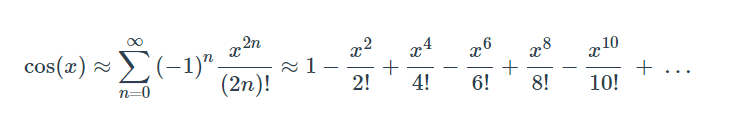

In [1]:
from IPython.display import Image
Image(filename='taylor.png') 

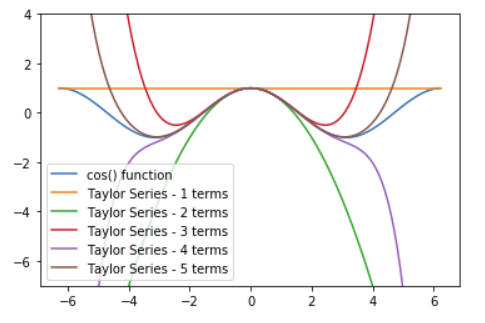

In [2]:
from IPython.display import Image
Image(filename='plot.png') 

## Terms in the Taylor Series

| Term Index | Mathematical Term | Term coded in Python |
| --- | --- | --- |
| 0 | $ + x^0/0!$ | ```(-1)**0 * x**0/math.factoral(0)``` |
| 1 | $ - x^2/2!$ | ```(-1)**1 * x**2/math.factoral(2)``` |
| 2 | $ + x^4/4!$ | ```(-1)**2 * x**4/math.factoral(4)``` |
| 3 | $ - x^6/6!$ | ```(-1)**3 * x**4/math.factoral(6)``` |

In [3]:
import math
math.factorial(0)

1

In [4]:
math.factorial(1)

1

In [5]:
from math import factorial, pi, cos

x = pi/4

approx = (-1)**0 * x**0/factorial(0) + (-1)**1 * x**2/factorial(2) + (-1)**2 * x**4/factorial(4)
print(approx)
print(cos(x))

0.707429206709773
0.7071067811865476


## Refactor the same functionality into a loop

In [6]:
from math import factorial, pi, cos

x = pi/4
approx = 0

for i in range(5):
    coef = (-1)**i
    num = x**(2*i)
    denom = factorial(i*2)
    term = coef * (num/denom)
    approx = approx + term
    error = abs(cos(x)-approx)
    print(f'after {i+1} terms, Taylor approx = {approx} with error = {error}')

after 1 terms, Taylor approx = 1.0 with error = 0.2928932188134524
after 2 terms, Taylor approx = 0.6915748624659576 with error = 0.01553191872059001
after 3 terms, Taylor approx = 0.707429206709773 with error = 0.000322425523225478
after 4 terms, Taylor approx = 0.7071032148228457 with error = 3.566363701912323e-06
after 5 terms, Taylor approx = 0.7071068056832942 with error = 2.4496746631186284e-08


## Refactor the same functionality into a function

In [7]:
def cos_approx(x=0,n_terms=3):
    approx = 0
    for i in range(n_terms):
        coef = (-1)**i
        num = x**(2*i)
        denom = factorial(i*2)
        term = coef * (num/denom)
        approx = approx + term
        
    return approx

In [8]:
cos_approx(pi/4,3)

0.707429206709773

In [9]:
for i in range(5):
    a = cos_approx(pi/4, i+1)
    err = abs(a-cos(pi/4))
    print(f'after {i+1} terms, Taylor approx = {a} with error = {err}')

after 1 terms, Taylor approx = 1.0 with error = 0.2928932188134524
after 2 terms, Taylor approx = 0.6915748624659576 with error = 0.01553191872059001
after 3 terms, Taylor approx = 0.707429206709773 with error = 0.000322425523225478
after 4 terms, Taylor approx = 0.7071032148228457 with error = 3.566363701912323e-06
after 5 terms, Taylor approx = 0.7071068056832942 with error = 2.4496746631186284e-08


## Use a while loop and a break statement to stop adding terms when an error limit is reached

set error limit $10^{-10}$

In [10]:
from math import cos, pi, factorial

i = 0
while i<100:
    a = cos_approx(pi/4, i+1)
    err = abs(a-cos(pi/4))
    print(f'after {i+1} terms, Taylor approx = {a} with error = {err}')
    i = i + 1
    if err<10e-10:
        break

after 1 terms, Taylor approx = 1.0 with error = 0.2928932188134524
after 2 terms, Taylor approx = 0.6915748624659576 with error = 0.01553191872059001
after 3 terms, Taylor approx = 0.707429206709773 with error = 0.000322425523225478
after 4 terms, Taylor approx = 0.7071032148228457 with error = 3.566363701912323e-06
after 5 terms, Taylor approx = 0.7071068056832942 with error = 2.4496746631186284e-08
after 6 terms, Taylor approx = 0.7071067810719247 with error = 1.146228667536775e-10


## See what happens when we find the cos of a bigger number

In [11]:
from math import cos, pi, factorial

x = 4*pi+1
i = 0
while i<100:
    a = cos_approx(x, i+1)
    err = abs(a-cos(x))
    print(f'after {i+1} terms, Taylor approx = {a} with error = {err}')
    i = i + 1
    if err<10e-10:
        break

after 1 terms, Taylor approx = 1.0 with error = 0.4596976941318599
after 2 terms, Taylor approx = -91.02320582307404 with error = 91.56350812894217
after 3 terms, Taylor approx = 1320.3551958362339 with error = 1319.8148935303657
after 4 terms, Taylor approx = -7338.282480839483 with error = 7338.8227831453505
after 5 terms, Taylor approx = 21118.70312873741 with error = 21118.16282643154
after 6 terms, Taylor approx = -37074.69784580372 with error = 37075.23814810959
after 7 terms, Taylor approx = 44063.83723639135 with error = 44063.29693408548
after 8 terms, Taylor approx = -37987.02115977953 with error = 37987.561462085396
after 9 terms, Taylor approx = 24934.5040914766 with error = 24933.96378917073
after 10 terms, Taylor approx = -12910.204855569762 with error = 12910.74515787563
after 11 terms, Taylor approx = 5419.223779948021 with error = 5418.683477642153
after 12 terms, Taylor approx = -1882.6497436260051 with error = 1883.1900459318733
after 13 terms, Taylor approx = 551.92

## Build a plot to show that as x increases (or decreases), the Taylor series approximation becomes less accurate

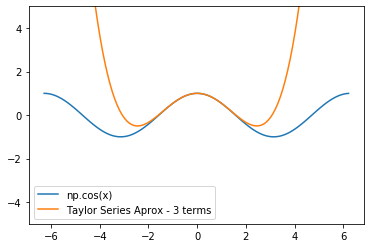

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)
t_cos = [cos_approx(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,p_cos)
ax.plot(angles,t_cos)
ax.set_ylim([-5,5])
ax.legend(['np.cos(x)','Taylor Series Aprox - 3 terms'])

plt.show()

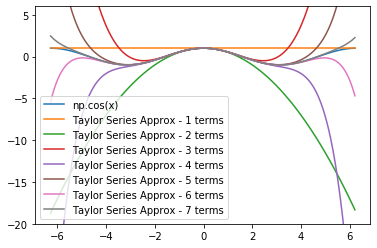

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_cos)

for i in range(1,8):
    t_cos = [cos_approx(angle,i) for angle in angles]
    ax.plot(angles,t_cos)

ax.set_ylim([-20,6])
# set up the legend
legend_lst = ['np.cos(x)']
for i in range(1,8):
    legend_lst.append(f'Taylor Series Approx - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()